Saving GirlJPG.jpg to GirlJPG (1).jpg


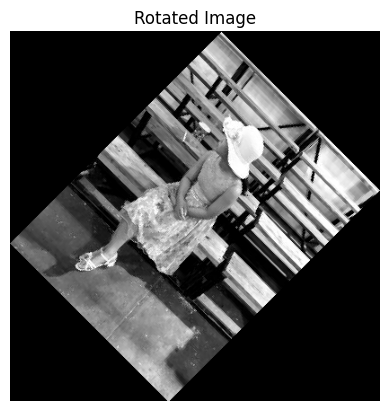

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload an image file
uploaded = files.upload()

# Assuming there's only one image uploaded, get the name of the file
image_filename = next(iter(uploaded))

# Read the image into a numpy array using matplotlib
image = plt.imread(image_filename)

# If the image has an alpha channel, discard it as we are only working with RGB
if image.shape[-1] == 4:
    image = image[..., :3]

def rotate_image(image, angle):
    theta = np.radians(angle)  # Convert angle to radians
    cos_theta, sin_theta = np.cos(theta), np.sin(theta)

    height, width = image.shape[:2]
    cx, cy = width // 2, height // 2  # Center of the image

    # Find new image dimensions
    new_width = int(abs(height * sin_theta) + abs(width * cos_theta))
    new_height = int(abs(width * sin_theta) + abs(height * cos_theta))

    # Create a new image with the new dimensions and same type as the original
    rotated_image = np.zeros((new_height, new_width, 3), dtype=image.dtype)
    new_cx, new_cy = new_width // 2, new_height // 2

    for y in range(new_height):
        for x in range(new_width):
            # Translate coordinates to rotate about the center of the new image
            x_translated, y_translated = x - new_cx, y - new_cy
            # Apply rotation matrix (backward)
            src_x = cx + x_translated * cos_theta + y_translated * sin_theta
            src_y = cy - x_translated * sin_theta + y_translated * cos_theta
            # Check if the source coordinates are within the bounds of the original image
            if 0 <= src_x < width and 0 <= src_y < height:
                rotated_image[y, x] = image[int(src_y), int(src_x)]

    return rotated_image

# Rotate the image 45 degrees
rotated_image = rotate_image(image, 45)

plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.axis('off')  # Hide the axes
plt.show()
